In [198]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [380]:
# import data
url = "https://raw.githubusercontent.com/kedeisha1/Challenges/main/coaster_db.csv"
coaster_data = pd.read_csv(url)

# 1. How many columns and rows are in the dataset?

In [98]:
print(f"There are {coaster_data.shape[0]} and {coaster_data.shape[1]} columns.")

There are 1087 and 56 columns.


# 2. Is there any missing data?

In [99]:
print(f"There are {coaster_data.isna().sum().sum()} missing data points in this dataset")

There are 29435 missing data points in this dataset


In [ ]:
# Missing data points per column
for i in coaster_data.columns:
    print(f"{i}: {coaster_data[i].isna().sum()}")

# 3. Display the summary statistics of the numeric columns using the describe method.

In [164]:
coaster_data.describe(include = np.number)

# 4. Rename the following columns:
- coaster_name ➡️ Coaster_Name
- year_introduced ➡️ Year_Introduced
- opening_date_clean ➡️ Opening_Date
- speed_mph ➡️ Speed_mph
- height_ft ➡️ Height_ft
- Inversions_clean ➡️ Inversions
- Gforce_clean ➡️ Gforce

In [165]:
# coaster_data = coaster_data.drop('Inversions', axis = 1)
new_cols = {'coaster_name': 'Coaster_Name', 
           'year_introduced': 'Year_Introduced', 
           'opening_date_clean': 'Opening_Date', 
           'speed_mph': 'Speed_mph', 
           'height_ft': 'Height_ft', 
           'Inversions_clean': 'Inversions', 
           'Gforce_clean': 'GForce'}

coaster_data = coaster_data.rename(columns = new_cols)

In [166]:
coaster_data.columns

Index(['Coaster_Name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Lift/launch system', 'Cost', 'Trains', 'Park section', 'Duration',
       'Capacity', 'G-force', 'Designer', 'Max vertical angle', 'Drop',
       'Soft opening date', 'Fast Lane available', 'Replaced', 'Track layout',
       'Fastrack available', 'Soft opening date.1', 'Closing date', 'Opened',
       'Replaced by', 'Website', 'Flash Pass Available',
       'Must transfer from wheelchair', 'Theme', 'Single rider line available',
       'Restraint Style', 'Flash Pass available', 'Acceleration', 'Restraints',
       'Name', 'Year_Introduced', 'latitude', 'longitude', 'Type_Main',
       'Opening_Date', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'Speed_mph', 'height_value', 'height_unit', 'Height_ft', 'Inversions',
       'GForce'],
      dtype='object')

# 5. Are there any duplicated rows?

In [103]:
# Duplicate
coaster_data.duplicated().sum()

0

# 6. What are the top 3 years with the most roller coasters introduced?

In [104]:
# Top 3 years with most roller coasters introduced

print("Top 3 Years with most roller coasters introduced")
coaster_data['Year_Introduced'].value_counts(ascending = False).nlargest(3) # could use .head(3) as well 

Top 3 Years with most roller coasters introduced


1999    49
2000    47
1998    32
Name: Year_Introduced, dtype: int64

# 7. What is the average speed? Also display a plot to show it’s distribution.

Text(0.5, 0, 'Speed_mph')

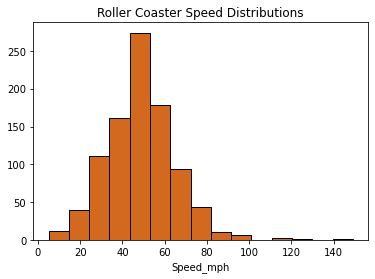

In [105]:
# Average speed
round(coaster_data.Speed_mph.mean(), 2)

# Display distribution
plt.hist(coaster_data.Speed_mph, color = 'chocolate', ec = 'black', bins = 15)
plt.title("Roller Coaster Speed Distributions")
plt.xlabel("Speed_mph")

# 8. Explore the feature relationships. Are there any positively or negatively correlated relationships?

In [168]:
# Correlation of Features
print(coaster_data.corr().unstack().sort_values().drop_duplicates())

longitude        latitude          -0.298488
speed1_value     latitude          -0.121847
height_value     longitude         -0.092764
Year_Introduced  latitude          -0.070982
GForce           Year_Introduced   -0.066657
latitude         Speed_mph         -0.063757
Inversions       latitude          -0.014043
height_value     latitude          -0.004265
latitude         Height_ft          0.011492
longitude        GForce             0.016485
latitude         GForce             0.042871
longitude        Speed_mph          0.051063
Inversions       longitude          0.087160
height_value     Year_Introduced    0.087687
speed1_value     height_value       0.088761
Inversions       height_value       0.108199
longitude        Height_ft          0.159733
Inversions       Height_ft          0.164246
Year_Introduced  longitude          0.175913
speed1_value     Inversions         0.176105
Speed_mph        Year_Introduced    0.204853
Year_Introduced  speed1_value       0.210191
          

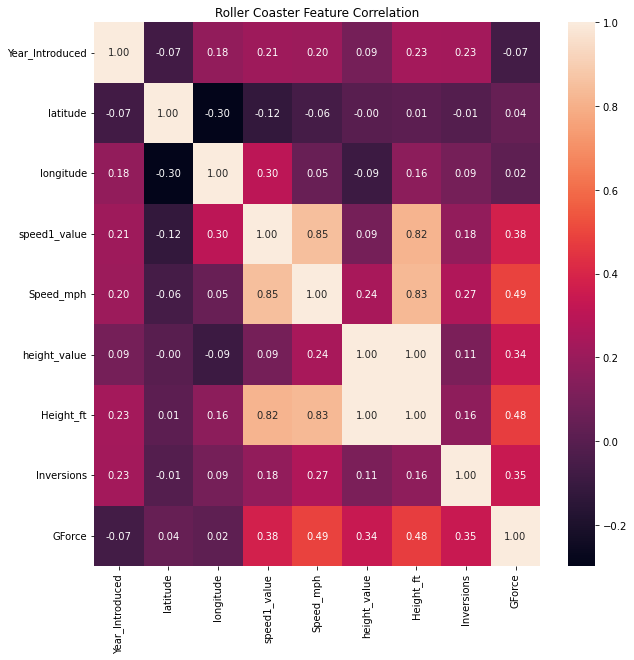

In [172]:
# Heatmap of Feature Correlations

fig, ax = plt.subplots(figsize = (10, 10))

sns.heatmap(coaster_data.corr(), annot = True, fmt = ',.2f',)
plt.title("Roller Coaster Feature Correlation")
plt.show()

Height and speed have are highly correlated at 82%. This makes sense as the higher a ride is in the air, the faster it can travel when going downhill. 

# 9. How many different 'Types' are there? Group them by common material

In [381]:
coaster_data['Type'].nunique() # There are 98 unique types

98

In [ ]:
coaster_data

In [383]:
# The common types are Wood, Steel, and Other 
# Transform the common types of materials

coaster_data.loc[coaster_data['Type'].str.contains('Steel', case = False, na = False), 'Type'] = 'Steel'
coaster_data.loc[coaster_data.Type.str.contains('Wood', case = False, na = False), 'Type'] = 'Wood'

coaster_data.loc[~coaster_data.Type.isin(['Steel', 'Wood']), 'Type'] = 'Other'

In [384]:
coaster_data.Type.unique()

array(['Wood', 'Other', 'Steel'], dtype=object)

In [385]:
coaster_data.Type.nunique()

3